In [42]:
# exploratory_analysis.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get the absolute path relative to the script location
def get_absolute_path(relative_path):
    return os.path.abspath(os.path.join(os.path.dirname('__file__'), relative_path))



In [43]:
# Load the preprocessed bike data
print("Loading preprocessed bike data...")
processed_data_file_path = get_absolute_path('../data/processed_bike_data.parquet')

# Check if the file exists
if not os.path.exists(processed_data_file_path):
    raise FileNotFoundError(f"The file {processed_data_file_path} does not exist.")

# Check the size of the Parquet file
file_size = os.path.getsize(processed_data_file_path) / (1024 * 1024)  # Size in MB
print(f"Size of the Parquet file: {file_size:.2f} MB")


Loading preprocessed bike data...
Size of the Parquet file: 37.67 MB


In [44]:
try:
    # Attempt to load the Parquet file
    bike_data = pd.read_parquet(processed_data_file_path, engine='pyarrow')
    print("Parquet file loaded successfully.")
except Exception as e:
    print(f"Failed to load Parquet file: {e}")


Parquet file loaded successfully.


In [45]:
# Optimize data types
print("Optimizing data types...")
bike_data['lat'] = bike_data['lat'].astype('float32')
bike_data['lon'] = bike_data['lon'].astype('float32')
bike_data['numbikesavailable'] = bike_data['numbikesavailable'].astype('int16')
bike_data['numdocksavailable'] = bike_data['numdocksavailable'].astype('int16')
bike_data['capacity'] = bike_data['capacity'].astype('int16')
bike_data['hour'] = bike_data['hour'].astype('int8')
bike_data['day_of_week'] = bike_data['day_of_week'].astype('int8')

# Convert date column to datetime
print("Converting date column to datetime...")
bike_data['date'] = pd.to_datetime(bike_data['date'])


Optimizing data types...
Converting date column to datetime...


In [46]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(bike_data.head())

# Display summary statistics
print("Summary statistics of the dataset:")
display(bike_data.describe())

# Display information about the dataset
print("Information about the dataset:")
display(bike_data.info())


First few rows of the dataset:


,stationcode,name,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,duedate,coordonnees_geo,nom_arrondissement_communes,date,lat,lon,hour,day_of_week
0,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,1,0,OUI,OUI,2021-01-01T00:47:00+00:00,"{'lat': 48.86598, 'lon': 2.27572}",Paris,2021-01-01 00:47:00+00:00,48.865978,2.27572,0,4
1,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,1,0,OUI,OUI,2021-01-01T02:10:00+00:00,"{'lat': 48.86598, 'lon': 2.27572}",Paris,2021-01-01 02:10:00+00:00,48.865978,2.27572,2,4
2,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,1,0,OUI,OUI,2021-01-01T02:56:00+00:00,"{'lat': 48.86598, 'lon': 2.27572}",Paris,2021-01-01 02:56:00+00:00,48.865978,2.27572,2,4
3,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,1,0,OUI,OUI,2021-01-01T03:28:00+00:00,"{'lat': 48.86598, 'lon': 2.27572}",Paris,2021-01-01 03:28:00+00:00,48.865978,2.27572,3,4
4,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,1,0,OUI,OUI,2021-01-01T04:02:00+00:00,"{'lat': 48.86598, 'lon': 2.27572}",Paris,2021-01-01 04:02:00+00:00,48.865978,2.27572,4,4


Summary statistics of the dataset:


,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,lat,lon,hour,day_of_week
count,8.775653e+06,8.775653e+06,8.775653e+06,8.775653e+06,8.775653e+06,8.775653e+06,8.775653e+06,8.775653e+06,8.775653e+06
mean,3.102071e+01,1.984811e+01,1.114602e+01,7.634245e+00,3.511773e+00,4.885791e+01,2.344249e+00,1.213938e+01,2.995346e+00
std,1.171015e+01,1.163832e+01,9.975060e+00,8.825920e+00,3.200917e+00,2.904148e-02,5.448463e-02,6.653474e+00,1.973454e+00
min,0.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.876462e+01,2.165600e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,1.200000e+01,4.000000e+00,1.000000e+00,1.000000e+00,4.883837e+01,2.308300e+00,7.000000e+00,1.000000e+00
50%,2.900000e+01,1.900000e+01,8.000000e+00,5.000000e+00,3.000000e+00,4.885906e+01,2.346200e+00,1.200000e+01,3.000000e+00
75%,3.700000e+01,2.700000e+01,1.600000e+01,1.100000e+01,5.000000e+00,4.887795e+01,2.379310e+00,1.800000e+01,5.000000e+00
max,6.000000e+02,6.000000e+02,3.790000e+02,1.220000e+02,2.840000e+02,4.895757e+01,2.538240e+00,2.300000e+01,6.000000e+00


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775653 entries, 0 to 8775652
Data columns (total 18 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   stationcode                  object             
 1   name                         object             
 2   is_installed                 object             
 3   capacity                     int16              
 4   numdocksavailable            int16              
 5   numbikesavailable            int16              
 6   mechanical                   int64              
 7   ebike                        int64              
 8   is_renting                   object             
 9   is_returning                 object             
 10  duedate                      object             
 11  coordonnees_geo              object             
 12  nom_arrondissement_communes  object             
 13  date                         datetime64[n

None

In [47]:
# Check for missing values
missing_values = bike_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for infinite values
infinite_values = bike_data.replace([np.inf, -np.inf], np.nan)
infinite_values = infinite_values.isnull().sum()
print("Infinite values in each column:\n", infinite_values)


Missing values in each column:
 stationcode                    0
name                           0
is_installed                   0
capacity                       0
numdocksavailable              0
numbikesavailable              0
mechanical                     0
ebike                          0
is_renting                     0
is_returning                   0
duedate                        0
coordonnees_geo                0
nom_arrondissement_communes    0
date                           0
lat                            0
lon                            0
hour                           0
day_of_week                    0
dtype: int64
Infinite values in each column:
 stationcode                    0
name                           0
is_installed                   0
capacity                       0
numdocksavailable              0
numbikesavailable              0
mechanical                     0
ebike                          0
is_renting                     0
is_returning                   

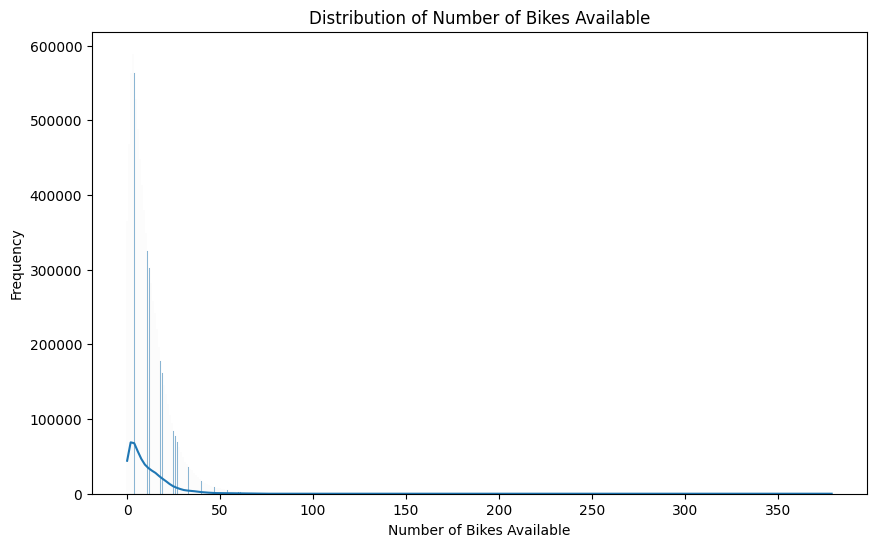

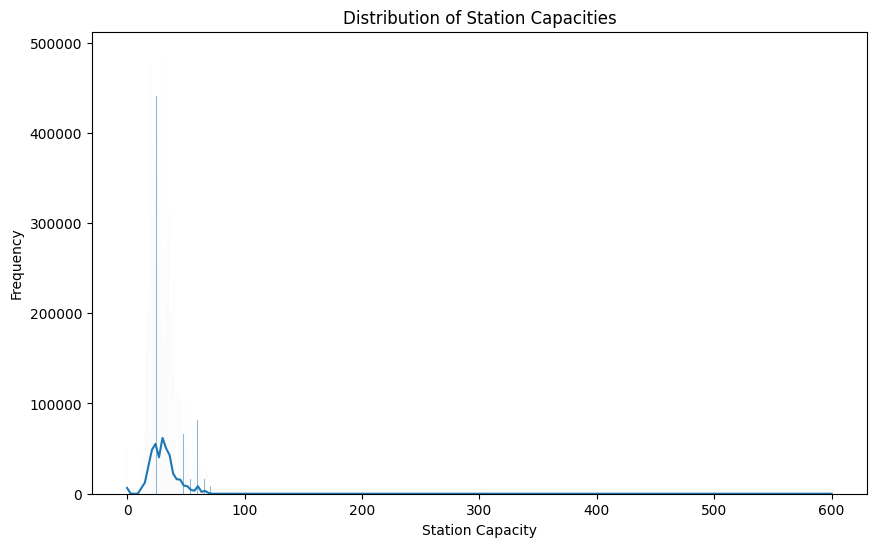

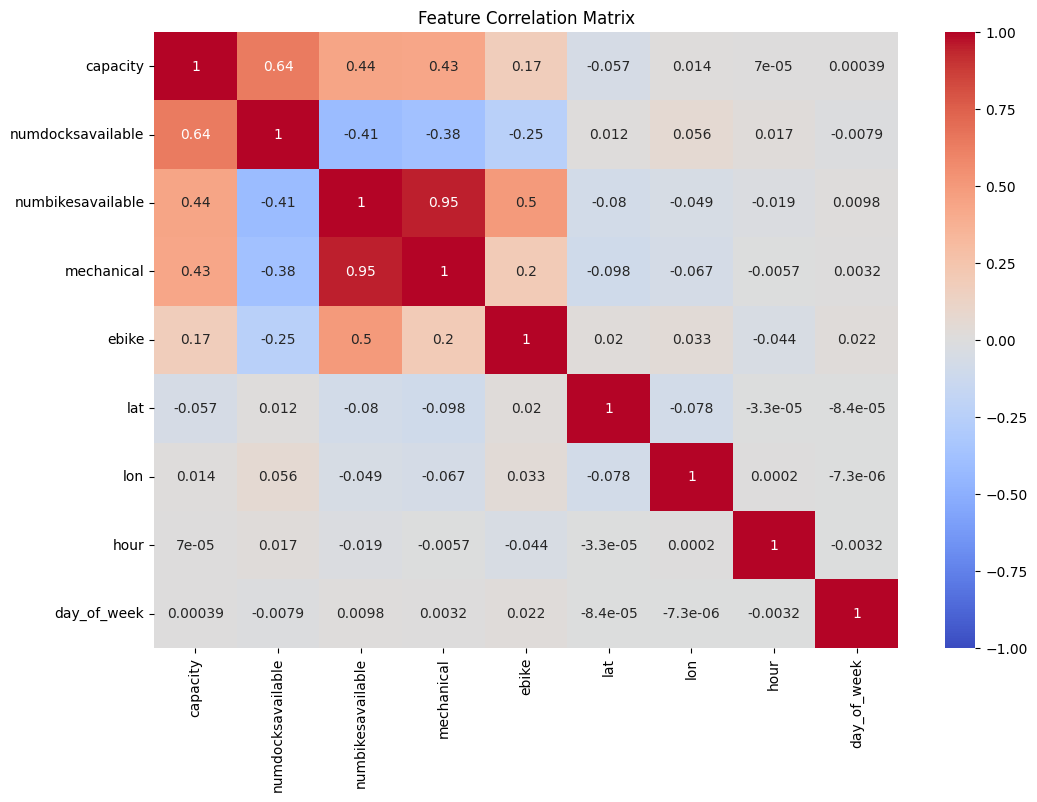

In [48]:
# Plot the distribution of the number of bikes available
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['numbikesavailable'], kde=True)
plt.title('Distribution of Number of Bikes Available')
plt.xlabel('Number of Bikes Available')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of station capacities
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['capacity'], kde=True)
plt.title('Distribution of Station Capacities')
plt.xlabel('Station Capacity')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns for correlation matrix
numeric_cols = bike_data.select_dtypes(include=[np.number])

# Check for potential data leakage by inspecting feature correlations
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


In [49]:
# Identify stations with insufficient data points
station_counts = bike_data['stationcode'].value_counts()
insufficient_data_stations = station_counts[station_counts <= 5]  # Adjust threshold as needed
print(f"Stations with insufficient data points:\n{insufficient_data_stations}")


Stations with insufficient data points:
Series([], Name: count, dtype: int64)


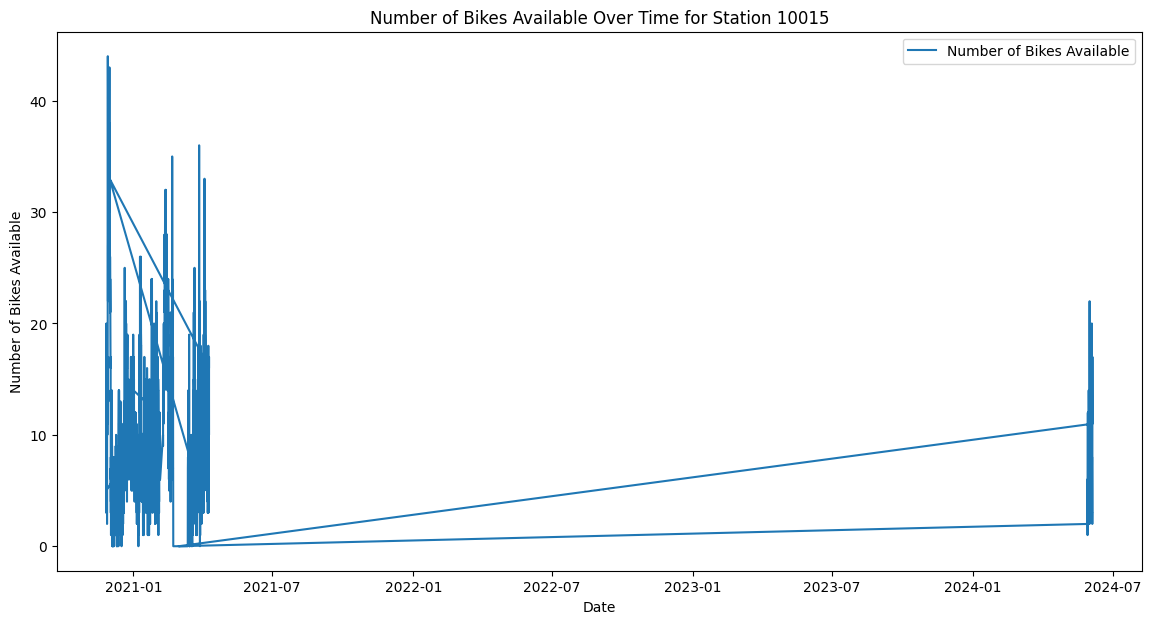

In [50]:
# Plot the number of bikes available over time for a specific station
station_code = '10015'  # Change this to analyze different stations
station_data = bike_data[bike_data['stationcode'] == station_code]
plt.figure(figsize=(14, 7))
plt.plot(station_data['date'], station_data['numbikesavailable'], label='Number of Bikes Available')
plt.xlabel('Date')
plt.ylabel('Number of Bikes Available')
plt.title(f'Number of Bikes Available Over Time for Station {station_code}')
plt.legend()
plt.show()


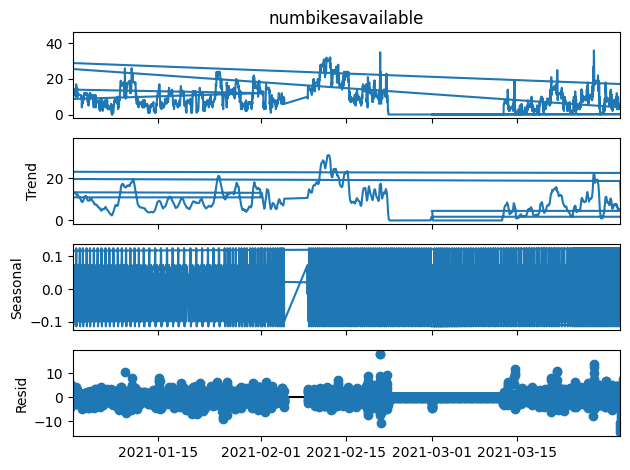

In [51]:
# Decompose the time series to analyze trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

station_data = station_data.set_index('date')
result = seasonal_decompose(station_data['numbikesavailable'], model='additive', period=24)

# Plot the decomposed time series
result.plot()
plt.show()


In [1]:
# Save the notebook (optional)
!jupyter nbconvert --to notebook --execute exploratory_analysis.ipynb


[NbConvertApp] Converting notebook exploratory_analysis.ipynb to notebook
Traceback (most recent call last):
  File "/Users/anthonybellon/Comp_Documents/VelibVisualisation/venv/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/anthonybellon/Comp_Documents/VelibVisualisation/venv/lib/python3.12/site-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/Users/anthonybellon/Comp_Documents/VelibVisualisation/venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/anthonybellon/Comp_Documents/VelibVisualisation/venv/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/Users/anthonybellon/Comp_Documents/VelibVisualisation/venv/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_not